# Breast Cancer Data Set


### Import libraries
We need to import  all the modules, functions  before using them

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


To make sure that every single line will be  printed, even if they're in the same cell, we can use thf ollowing config:

# Importing your data

After downloading the dataset files from UCI, you can either move them to the local directory you want to work in or to your Colab directory in your google drive and work on them in the cloud. The path we choose is for the latter choice. Here are the four datasets we chose to work on for this assignment:

* **A study of Asian Religious and Biblical Texts Data Set**: Social study; 590 data points (instances); 8265 features (attributes)

In [0]:
input_path = '/content/gdrive/My Drive/ML_Course/'



# Working with Asian texts dataset
relegion_labelled = pd.read_csv(input_path+'AllBooks_baseline_DTM_Labelled.csv')
#relegion_unlabelled = pd.read_csv(input_path+'AllBooks_baseline_DTM_Unlabelled.csv', index_col=None)
#relegion_labelled.reset_index(drop=True, inplace=True)
relegion_unlabelled.reset_index(drop=True, inplace=True)

target_dataset = relegion_labelled
target_dataset.shape
target_dataset.rename(columns={"Unnamed: 0" : "Type"},inplace=True)
target_dataset["Type"] = target_dataset["Type"].str.split("_",expand=True)[0]

In [26]:
target_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Columns: 8267 entries, Type to explains
dtypes: int64(8266), object(1)
memory usage: 37.2+ MB


In [28]:
target_dataset

Type  foolishness  hath  ...  illumines  attire  explains
0        Buddhism            0     0  ...          0       0         0
1        Buddhism            0     0  ...          0       0         0
2        Buddhism            0     0  ...          0       0         0
3        Buddhism            0     0  ...          0       0         0
4        Buddhism            0     0  ...          0       0         0
..            ...          ...   ...  ...        ...     ...       ...
585  BookOfWisdom            0     2  ...          0       0         0
586  BookOfWisdom            0     0  ...          0       0         0
587  BookOfWisdom            0     0  ...          0       0         0
588  BookOfWisdom            0     0  ...          0       0         0
589  BookOfWisdom            0     0  ...          0       0         0

[590 rows x 8267 columns]

### Summarize the Dataset



*   Dimensions of the dataset.
*   Describtion of the dataset.

  Statistical summary of all attributes.
  
*   Class Distribution



**Statistical Summary**

In [29]:
# descriptions

print(target_dataset.describe())

       foolishness        hath   wholesome  ...   illumines      attire    explains
count   590.000000  590.000000  590.000000  ...  590.000000  590.000000  590.000000
mean      0.003390    0.566102    0.006780  ...    0.008475    0.005085    0.003390
std       0.058173    1.777487    0.082129  ...    0.091744    0.071186    0.058173
min       0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%       0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
50%       0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
75%       0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
max       1.000000   14.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 8266 columns]


In [0]:
target_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
Class          286 non-null int64
age            286 non-null int64
menopause      286 non-null int64
tumor-size     286 non-null int64
inv-nodes      286 non-null int64
node-caps      286 non-null int64
deg-malig      286 non-null int64
breast         286 non-null int64
breast-quad    286 non-null int64
irradiat       286 non-null int64
dtypes: int64(10)
memory usage: 22.5 KB


In [35]:
# class distribution
print(target_dataset.groupby('Type').size())
#target_dataset.groupby('Type').describe()

Type
BookOfEccleasiasticus     50
BookOfEcclesiastes        12
BookOfProverb             31
BookOfWisdom              19
Buddhism                  46
TaoTeChing                81
Upanishad                162
YogaSutra                189
dtype: int64


foolishness                           ... explains               
                            count      mean       std  min  ...      25%  50%  75%  max
Type                                                        ...                        
BookOfEccleasiasticus        50.0  0.000000  0.000000  0.0  ...      0.0  0.0  0.0  0.0
BookOfEcclesiastes           12.0  0.000000  0.000000  0.0  ...      0.0  0.0  0.0  0.0
BookOfProverb                31.0  0.064516  0.249731  0.0  ...      0.0  0.0  0.0  0.0
BookOfWisdom                 19.0  0.000000  0.000000  0.0  ...      0.0  0.0  0.0  0.0
Buddhism                     46.0  0.000000  0.000000  0.0  ...      0.0  0.0  0.0  0.0
TaoTeChing                   81.0  0.000000  0.000000  0.0  ...      0.0  0.0  0.0  0.0
Upanishad                   162.0  0.000000  0.000000  0.0  ...      0.0  0.0  0.0  1.0
YogaSutra                   189.0  0.000000  0.000000  0.0  ...      0.0  0.0  0.0  1.0

[8 rows x 66128 columns]

In [31]:
# datatype
target_dataset.dtypes

Type           object
foolishness     int64
hath            int64
wholesome       int64
takest          int64
                ...  
visual          int64
thoughts        int64
illumines       int64
attire          int64
explains        int64
Length: 8267, dtype: object

In [0]:
cat_columns = target_dataset.select_dtypes(['object']).columns
target_dataset[cat_columns] = target_dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])


## Building classification models
Among the available classification methods in Python, we focus on the following five to build classification models of tissue type of the cancer cell lines in our dataset:

*   **K- nearest neighbour**
*   Logistic regression
*   Naive Bayes
*   Random forest




### Splitting data to training and testing sets

If we use one of our labeled fruit examples in the data that we use to train the classifier, we can't also use that same irish data as a test sample to also evaluate the classifier.

The machine learning Algorithm needs to work well on any input sample (Training Set), any new pieces of data that we might see in the future(Test Set).



To investigate performance of our model, we need to split the data to training and testing sets(validation set). This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(target_dataset, target_dataset['Type'], test_size=0.30, random_state=5)


In [38]:
print(f'train: {X_train.size}')
print(f'test: {X_test.size}')

train: 3414271
test: 1463259


## K nearest neighbour(KNN)
K nearest neighbour uses a distance metric like Euclidean distance to identity similarity of target data point (sample) in test or validation set to the data points (samples) in the trainign set. Then based on the user specified k, it finds the k closest points (samples) to the target data point. Afterward, it chooses the most frequent label among the k closes points (majority voting) as the class label of the target sample. The class labels can be also assigned based on weighted voting of the k closest data points to the data point.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [40]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test.values)


[0 2 2 0 2 5 2 0 1 0 0 0 5 3 2 2 3 2 0 2 0 2 2 0 3 3 0 2 2 7 6 4 0 2 5 4 7
 6 2 2 0 2 2 0 2 0 0 2 4 3 2 2 7 2 2 2 2 2 5 2 2 3 2 2 3 4 2 2 3 2 2 4 0 2
 2 2 2 2 0 2 4 0 7 2 2 2 2 6 2 2 2 2 0 2 7 0 2 0 0 2 0 2 0 0 3 2 6 7 0 0 5
 2 2 2 2 0 3 2 3 0 2 2 2 2 2 6 2 2 2 2 0 0 2 2 2 3 2 0 2 2 2 2 2 2 0 2 2 2
 2 0 2 0 2 3 0 3 2 2 0 2 0 2 2 0 2 0 2 0 2 3 5 6 0 0 5 3 4]
[1 2 3 0 2 5 3 1 1 1 0 0 5 4 3 2 3 3 1 2 2 3 2 2 3 3 1 3 3 7 6 4 1 1 6 4 6
 4 2 3 1 2 2 1 3 1 2 2 4 3 2 2 7 2 6 2 2 3 5 2 2 3 2 2 6 4 2 7 3 3 2 4 1 3
 3 3 3 3 1 3 4 0 7 3 2 3 2 6 3 2 3 3 1 2 6 0 2 1 2 3 0 3 0 2 7 2 6 6 2 2 5
 3 2 6 3 1 3 3 3 2 3 3 3 3 0 6 3 3 3 3 2 2 3 2 3 3 3 1 3 3 3 3 3 3 2 3 3 2
 3 2 3 1 2 3 1 3 3 3 2 3 0 3 2 2 3 0 6 2 2 3 6 6 1 1 6 3 4]


In [41]:
from sklearn import metrics

print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average=None))


Confusion matrix of the predictions:
 [[ 9  0  1  0  0  0  0  0]
 [19  1  1  0  0  0  0  0]
 [15  0 32  0  0  0  0  0]
 [ 0  0 53 13  0  0  0  0]
 [ 0  0  0  1  7  0  1  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  3  1  0  3  5  3]
 [ 0  0  1  1  0  0  0  3]]
accuracy of the predictions: 0.4180790960451977
precision [0.20930233 1.         0.35164835 0.8125     1.         0.57142857
 0.83333333 0.5       ]


In [42]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 0.4180790960451977
blanced accuracy of the predictions: 0.5670688649412053
MCC of the predictions: 0.31894946102777594
Confusion matrix of the predictions: [[ 9  0  1  0  0  0  0  0]
 [19  1  1  0  0  0  0  0]
 [15  0 32  0  0  0  0  0]
 [ 0  0 53 13  0  0  0  0]
 [ 0  0  0  1  7  0  1  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  3  1  0  3  5  3]
 [ 0  0  1  1  0  0  0  3]]


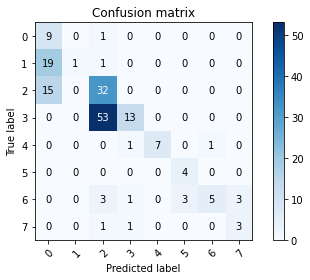

In [44]:

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
 
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes= target_dataset['Type'].unique(),
                      title='Confusion matrix')

plt.show()


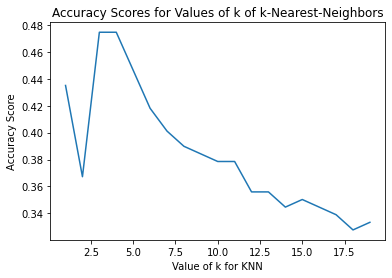

In [45]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## Logistic regression
If we have set of features X1 to Xn, y can be obtained as:
\begin{equation*} y=b0+b1X1+b2X2+...+bnXn\end{equation*}

where y is the predicted value obtained by weighted sum of the feature values.

Then probability of each class (for example tissue class BREAST) can be obtained using the logistic function 

\begin{equation*} p(class=BREAST)=\frac{1}{(1+exp(-y))} \end{equation*}

Based on the given class labels and the features given in the trainign data, coefficients b0 to bn can be ontained during the optimization process.

b0 to bn are fixed for all samples while X1 to Xn are feature values specific to each sample. Hence, the logistic function will give us probability of each class assigned to each sample. Finally, the model will choose the class with the highest probability for each sample.


**Note.** The logistic regression model is parametric and the parameters are the regression coefficiets b0 to bn.


In [46]:
from sklearn.linear_model import LogisticRegression as LR

# Initialize our classifier
#logreg = LogisticRegression()
logreg = LR()

# Fitting the model with the data
logreg.fit(X_train, y_train)

# prediction in test set
y_pred = logreg.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 2, 3, 0, 2, 6, 3, 1, 1, 1, 0, 0, 5, 6, 3, 2, 3, 3, 1, 2, 2, 3,
       2, 2, 3, 3, 1, 3, 3, 7, 6, 4, 1, 1, 6, 4, 6, 6, 2, 3, 1, 2, 2, 1,
       3, 1, 2, 2, 4, 3, 2, 2, 3, 2, 6, 2, 2, 3, 5, 2, 2, 3, 2, 2, 3, 4,
       2, 3, 3, 3, 2, 4, 1, 2, 3, 3, 3, 3, 1, 3, 4, 0, 6, 3, 2, 3, 2, 6,
       3, 2, 3, 3, 2, 3, 6, 0, 2, 2, 2, 3, 0, 3, 0, 2, 7, 2, 6, 6, 2, 2,
       6, 3, 2, 6, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 0, 6, 3, 3, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 3,
       1, 3, 3, 3, 2, 3, 0, 3, 2, 2, 3, 0, 3, 2, 3, 3, 6, 6, 1, 1, 6, 3,
       4])

accuracy of the predictions: 0.9152542372881356
blanced accuracy of the predictions: 0.7929853243683032
MCC of the predictions: 0.8884101561942209
Confusion matrix of the predictions: [[10  0  0  0  0  0  0  0]
 [ 0 18  3  0  0  0  0  0]
 [ 0  0 45  2  0  0  0  0]
 [ 0  0  1 65  0  0  0  0]
 [ 0  0  0  0  7  0  2  0]
 [ 0  0  0  0  0  2  2  0]
 [ 0  0  0  2  0  0 13  0]
 [ 0  0  0  2  0  0  1  2]]
Confusion matrix of the predictions:
 [[10  0  0  0  0  0  0  0]
 [ 0 18  3  0  0  0  0  0]
 [ 0  0 45  2  0  0  0  0]
 [ 0  0  1 65  0  0  0  0]
 [ 0  0  0  0  7  0  2  0]
 [ 0  0  0  0  0  2  2  0]
 [ 0  0  0  2  0  0 13  0]
 [ 0  0  0  2  0  0  1  2]]


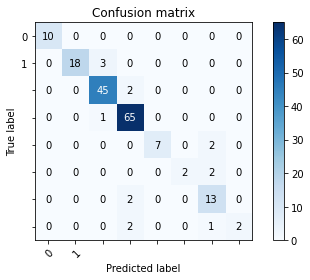

In [47]:
from sklearn import metrics

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=[0,1],
                      title='Confusion matrix')

plt.show()


# Building classification models

Among the available classification methods in Python, we focus on the following five to build classification models in our dataset:

* Logistic regression
* K- nearest neighbour
* **Naive Bayes**
* Random forest



In [0]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

In [49]:
y_pred = model.predict(X_test)
print(y_pred)

[2 2 3 0 3 6 3 1 1 1 0 3 6 6 3 2 3 3 1 2 2 3 2 2 3 3 1 3 3 6 6 6 1 2 6 4 6
 6 2 3 1 2 2 1 3 1 2 2 4 3 2 2 6 2 6 2 2 3 6 2 2 3 2 2 6 6 2 6 3 3 2 4 3 3
 3 3 3 3 1 3 4 0 6 3 2 3 2 6 3 2 3 3 1 3 6 0 2 1 2 3 0 3 0 2 6 2 6 6 2 2 6
 3 2 6 3 1 3 3 3 2 3 3 3 3 0 6 3 3 3 3 3 2 3 2 3 3 3 1 3 3 3 3 3 3 2 3 3 2
 3 2 3 1 2 3 1 3 3 3 2 3 0 3 2 2 3 0 6 2 3 3 6 6 1 1 6 3 4]


In [50]:
model.predict_proba(X_train)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [51]:
gnb = GaussianNB()

# Fitting the model with the data
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Testing the model on the testing set:

In [52]:
y_pred = model.predict(X_test)
print(y_pred)

[2 2 3 0 3 6 3 1 1 1 0 3 6 6 3 2 3 3 1 2 2 3 2 2 3 3 1 3 3 6 6 6 1 2 6 4 6
 6 2 3 1 2 2 1 3 1 2 2 4 3 2 2 6 2 6 2 2 3 6 2 2 3 2 2 6 6 2 6 3 3 2 4 3 3
 3 3 3 3 1 3 4 0 6 3 2 3 2 6 3 2 3 3 1 3 6 0 2 1 2 3 0 3 0 2 6 2 6 6 2 2 6
 3 2 6 3 1 3 3 3 2 3 3 3 3 0 6 3 3 3 3 3 2 3 2 3 3 3 1 3 3 3 3 3 3 2 3 3 2
 3 2 3 1 2 3 1 3 3 3 2 3 0 3 2 2 3 0 6 2 3 3 6 6 1 1 6 3 4]


In [53]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 0.8813559322033898
blanced accuracy of the predictions: 0.6534490037149612
MCC of the predictions: 0.8471745604739424
Confusion matrix of the predictions: [[ 9  0  0  1  0  0  0  0]
 [ 0 18  2  1  0  0  0  0]
 [ 0  0 43  4  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  0  5  0  4  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  5  0]]




# Building classification models

Among the available classification methods in Python, we focus on the following five to build classification models in our dataset:

* Logistic regression
* K- nearest neighbour
* Naive Bayes
* **Random forest**


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RFclf = RandomForestClassifier(max_depth=2, random_state=0)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test)
print(RFclf.feature_importances_)

[0.02806915 0.         0.01098862 ... 0.         0.00039609 0.        ]


In [55]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))


accuracy of the predictions: 0.6440677966101694
blanced accuracy of the predictions: 0.30372340425531913
MCC of the predictions: 0.5182945351874607
Confusion matrix of the predictions: [[ 0  0  7  3  0  0  0  0]
 [ 0  0  8 13  0  0  0  0]
 [ 0  0 39  8  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  5  0  0  4  0]
 [ 0  0  0  3  0  0  1  0]
 [ 0  0  0  6  0  0  9  0]
 [ 0  0  0  5  0  0  0  0]]
Confusion matrix of the predictions:
 [[ 0  0  7  3  0  0  0  0]
 [ 0  0  8 13  0  0  0  0]
 [ 0  0 39  8  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  5  0  0  4  0]
 [ 0  0  0  3  0  0  1  0]
 [ 0  0  0  6  0  0  9  0]
 [ 0  0  0  5  0  0  0  0]]


accuracy of the predictions: 0.6440677966101694
blanced accuracy of the predictions: 0.30372340425531913
MCC of the predictions: 0.5182945351874607
Confusion matrix of the predictions: [[ 0  0  7  3  0  0  0  0]
 [ 0  0  8 13  0  0  0  0]
 [ 0  0 39  8  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  5  0  0  4  0]
 [ 0  0  0  3  0  0  1  0]
 [ 0  0  0  6  0  0  9  0]
 [ 0  0  0  5  0  0  0  0]]


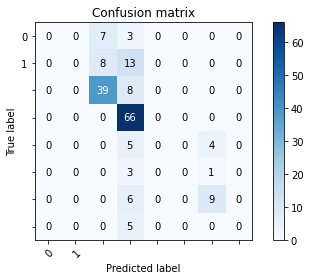

In [56]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=[0,1],
                      title='Confusion matrix')

plt.show()
